In [1]:
import cv2 as cv
import mediapipe as mp
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions_Squat import height_ratio

In [3]:
path = "C:\\Users\\Cian\\Downloads\\Squat Vids\\1 (26).mp4"
X = height_ratio(path)

Text(0, 0.5, 'Height Ratio')

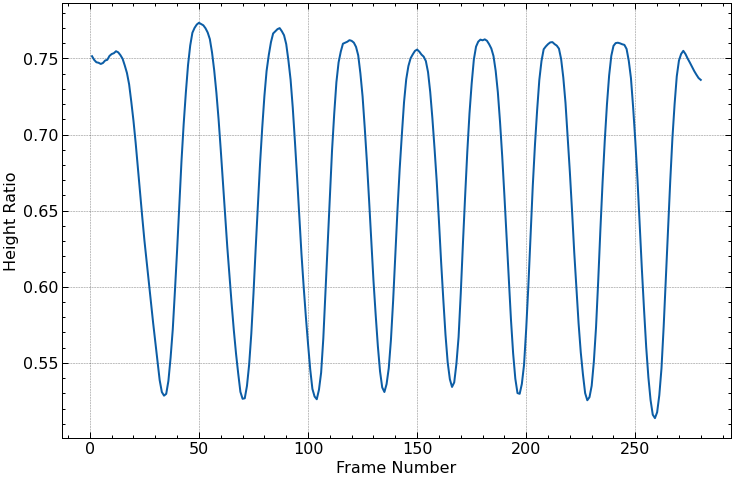

In [4]:
frame_num = np.arange(1,len(X)+1,1)
plt.figure(figsize=(12,8))
plt.plot(frame_num,X)
plt.xlabel('Frame Number')
plt.ylabel('Height Ratio')

## Create Sequences

In [89]:
window = 19
sequences = np.zeros((X.shape[0]-window+1, window))
for i in range(window,X.shape[0]+1):
    sequences[i-window] = X[i-window:i]

## Create Labels

Now create the labels for each frame based on timestamps that I create after watching the video myself.

The timestamps will work as follows:
- List 1 = times at which classes change from one to another.
- List 2 = numbers representing which order the classes are ordered.

In this case the labels will be as follows:
- Not Squat = 0
- Concentric Contraction = 1
- Eccentric Contraction = 2

I will then make a tensor of containing the same number of elements as there are frames in the video. Finally I will change it to a OneHot Encoded form as follows:

### Classes:
- Not Squat = $[1,0,0]$
- Concentric Contraction = $[0,1,0]$
- Eccentric Contraction = $[0,0,1]$

In [90]:
#This is for the video called 1(1).mp4
# list1 = [0,0.77,1.75,2.65,2.94,4.01,5.16,6.49,7.42,7.69,8.88,9.9,11.12,12.27,13.47,14.6,15.00,16.11,17.13,17.59,18.75,19.72,20.12,21.36,22.29]
# list2 = [0,2,1,0,2,1,2,1,0,2,1,2,1,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(2).mp4
# list1 = [0,5.82,6.8,7.79,8.21,9.27,10.19,10.5,11.48,12.47,12.8,13.86,14.98,15.22,16.23,17.33,17.66,18.78,19.9,20.2,21.24,22.16,22.71,23.76,24.77]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(3).mp4
# list1 = [0,3.36,4.27,5.02,5.57,6.36,7.11,7.52,8.35,9.08,9.50,10.33,11.11,11.5,12.36,13.16,13.57,14.36,15.14,15.66,16.53,17.28,17.75,18.6,19.38]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(4).mp4
# list1 = [0,3.96,5.03,6,6.25,7.07,7.79,8.14,8.96,9.74,9.99,10.76,11.48,11.8,12.56,13.52,14.39,15.24,15.54,16.3,17.21,17.81,18.56,19.39]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(5).mp4
# list1 = [0,0.35,1.17,1.87,2.86,3.81,4.48,5.42,6.32,7.05,8.04,8.92,9.65,10.56,11.46,12.12,13.04,13.93,14.65,15.51,16.37,17.23,17.98,18.9]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(6).mp4
# list1 = [0,0.11,0.83,1.4,2.19,2.96,3.56,4.33,5.04,5.64,6.49,7.31,7.81,8.57,9.38,9.93,10.71,11.49,11.97,12.83,13.62,14.06,14.86,15.62,16.1,16.85,17.63]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(7).mp4
# list1 = [0,1.43,2.14,2.91,3.33,4.06,4.9,5.4,6.15,6.92,7.49,8.28,9.11,9.63,10.31,11.04,11.61,12.34,13.07,13.57,14.28,15.02]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(8).mp4
# list1 = [0,3.39,4.22,5.19,5.5,6.36,7.33,7.59,8.41,9.31,9.55,10.41,11.33,11.58,12.39,13.29,13.61,14.43,15.35,15.6,16.37,17.41,17.59,18.44,19.34]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(9).mp4
# list1 = [0,2.82,3.84,4.73,5.78,6.54,7.58,8.37,9.27,10.1,11.07,11.94,12.81,13.62,14.57,15.36,16.23,17.1]
# list2 = [0,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,0]

#This is for the video called 1(10).mp4
# list1 = [0,3,3.89,4.66,5.48,6.2,6.52,7.26,7.95,8.27,8.99,9.97,10.84,11.8,12.7,13.49,13.7,14.54,15.4]
# list2 = [0,2,1,2,1,0,2,1,0,2,1,2,1,2,1,0,2,1,0]

#This is for the video called 1(11).mp4
# list1 = [0,1.34,2.52,3.29,3.63,4.5,5.3,5.55,6.43,7.19,7.59,8.47,9.25,9.7,10.54,11.27,11.7,12.52,13.27,13.75,14.57,15.33,15.66,16.54,17.43]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(12).mp4
# list1 = [0,0.7,1.31,1.99,2.28,2.9,3.63,3.94,4.59,5.33,5.7,6.33,7,7.32,7.95,8.69,9.02,9.65,10.42,10.76,11.45,12.17]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(13).mp4
# list1 = [0,1.4,2.24,2.99,3.97,4.75,5.79,6.46,7.57,8.39,8.76,9.53,10.3,10.78,11.54,12.32,12.68,13.49,14.26]
# list2 = [0,2,1,2,1,2,1,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(14).mp4
# list1 = [0,5.3,6.34,7.13,7.49,8.43,9.37,9.78,10.67,11.63,11.96,12.91,13.82,14.12,15.06,15.81,16.19,17.07,17.89,18.24,19.06,19.92]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(15).mp4
# list1 = [0,1.93,2.85,3.76,4.13,4.92,5.71,6.14,6.93,7.86,8.1,8.82,9.68,10.1,10.85,11.65,12.1,12.86,13.72,14.17,14.95,15.83]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(16).mp4
# list1 = [0,0.38,1.35,2.23,3.02,3.32,4.06,4.81,5.17,5.92,6.9,7.75,8.65,8.89,9.65,10.5,10.83,11.57,12.5,13.43,14.31,14.54,15.32,16.2,16.54,17.27,18.18]
# list2 = [2,1,2,1,0,2,1,0,2,1,2,1,0,2,1,0,2,1,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(17).mp4
# list1 = [0,4.65,5.82,6.89,7.27,8.52,9.93,10.19,11.43,12.57,13.11,14.35,15.36,15.68,16.83,18.04,18.42,19.69,20.87,21.32,22.63,23.77,24.34,25.65,26.98,27.38,28.71,29.91]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(18).mp4
# list1 = [0,0.55,1.33,1.87,2.86,3.58,4.07,5.01,5.76,6.17,7.07,7.83,8.18,9.05,9.82,10.2,11.1,11.88,12.18,13.03,13.75,14.1,14.98,15.65,]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(19).mp4
# list1 = [0,0.39,1.22,2.22,2.96,3.93,4.6,5.53,6.36,7.3,8.03,9.03,9.83,10.65,11.45,12.26,12.86]
# list2 = [2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,0]

#This is for the video called 1(20).mp4
# list1 = [0,0.54,1.29,1.64,2.46,3.18,3.52,4.37,5.07,5.52,6.37,7.07,7.56,8.42,9.17,9.64,10.5,11.28,11.79,12.67,13.37,13.99,14.81,15.52]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(21).mp4
# list1 = [0,1.67,2.49,3.31,3.64,4.37,5.08,5.38,6.12,6.83,7.1,7.76,8.45,8.76,9.44,10.16,10.48,11.18,11.89,12.21,12.88,13.66,13.99,14.66,15.42]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(22).mp4
# list1 = [0,0.47,1.74,2.81,3.39,4.69,5.82,6.24,7.75,9.02,9.72,11.3,12.52,13.14,14.6,15.8,16.29,17.81,18.96,19.34,20.74,21.85]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(23).mp4
# list1.append([0,1.84,2.62,3.32,3.42,4.16,4.95,5.23,5.97,6.74,7,7.86,8.63,9.01,9.74,10.52,10.94,11.67,12.44,12.77,13.59,14.4,14.75,15.46,16.28])
# list2.append([0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0])

#This is for the video called 1(24).mp4
# list1 = [0,0.52,1.63,2.42,2.8,3.96,4.79,5.18,6.23,7.03,7.42,8.5,9.33,9.75,10.72,11.66,12.18,13.27,14.08,14.7,15.82,16.69,17.24,18.3,19.23,19.7,20.65,21.44]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(25).mp4
# list1 = [0,0.99,1.74,2.04,2.86,3.63,3.98,4.87,5.65,5.96,6.91,7.7,8.01,8.85,9.65,9.95,10.85,11.64,11.96,12.78,13.6,]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#This is for the video called 1(26).mp4
list1 = [0,0.89,2.25,3.15,3.53,4.7,5.61,5.89,6.89,7.7,8.08,8.96,9.76,10.16,11.05,11.86,12.25,13.07,13.91,14.24,15.23,16,16.3,17.24,18.04]
list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

len(list1),len(list2)

(25, 25)

In [91]:
#define the timesteps based on the fps (15 in this case)
dt = 1/15

#Initiallize the labels as an empty array
labels = np.zeros(X.shape[0])

for i in range(len(list1)-1):
    index0 = round(list1[i]/dt)
    index1 = round(list1[i+1]/dt) + 1
    labels[index0:index1] = int(list2[i])

#Since the sequences start with length X, we need to get rid of the first X labels.
labels = labels[int(window/2):-int(window/2)]

#Now change the labels into categorical form using keras
Labels = to_categorical(labels, 3)

In [92]:
np.save('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Classification\\Training Data\\Data26.npy', sequences)
np.save('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Classification\\Training Data\\Labels26.npy', Labels)